In [35]:
import pandas as pd
from sklearn.gaussian_process.kernels import Kernel
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt

Load Data 

In [36]:
rt_data = pd.read_csv('../../data/rt_data.csv', parse_dates=[0], index_col=0)

In [37]:
class FractionalBrownianMotionKernel(Kernel):
    def __init__(self, H):
        self.H = H
    
    def __call__(self, X, Y=None):
        X = np.atleast_2d(X)
        two_H = 2* self.H
        Y = X if Y is None else np.atleast_2d(Y)
        cov = 0.5 * (np.abs(X)**two_H + np.abs(Y.T)**two_H - np.abs(X-Y.T)**two_H)
        return cov

    def diag(self, X):
        return np.ones(X.shape[0])

    def is_stationary(self):
        return True

In [38]:
spy_rt = rt_data['SPY']

<Axes: xlabel='Datetime'>

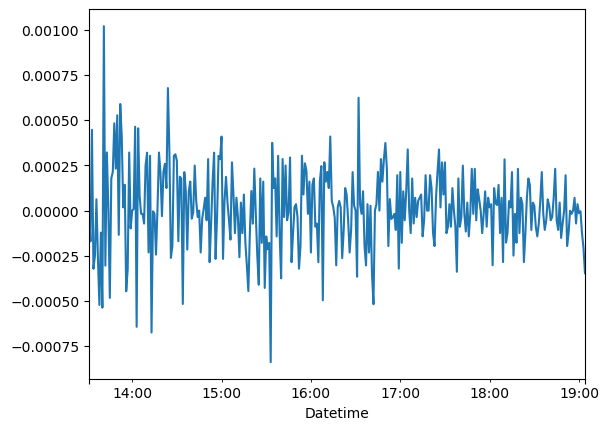

In [39]:
spy_rt.plot()

In [40]:
x_train = np.arange(len(spy_rt)).reshape(-1,1)/362880

In [41]:
kernel = FractionalBrownianMotionKernel(H = 0.5)
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(x_train, spy_rt)

GaussianProcessRegressor(kernel=FractionalBrownianMotionKernel())

In [42]:
x_test = (np.arange(len(spy_rt)*10)/10).reshape(-1,1)/362880

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


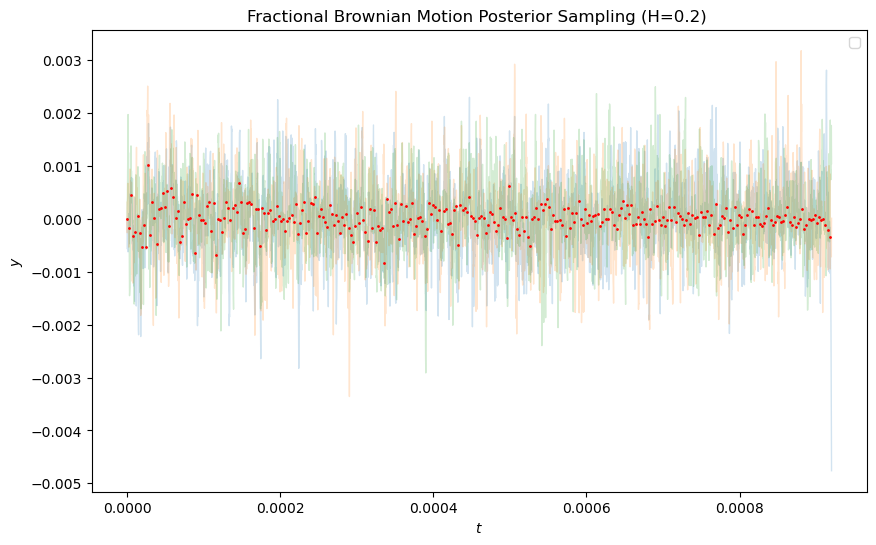

In [43]:
y_samples_posterior = gp.sample_y(x_test, 3, random_state=0)

# Plot the generated Brownian Bridge paths
plt.figure(figsize=(10, 6))
for i in range(y_samples_posterior.shape[1]):
    plt.plot(x_test, y_samples_posterior[:, i], lw=1, alpha = 0.2)
plt.plot(x_train, spy_rt, 'ro', markersize=1)

plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('Fractional Brownian Motion Posterior Sampling (H=0.2) ')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


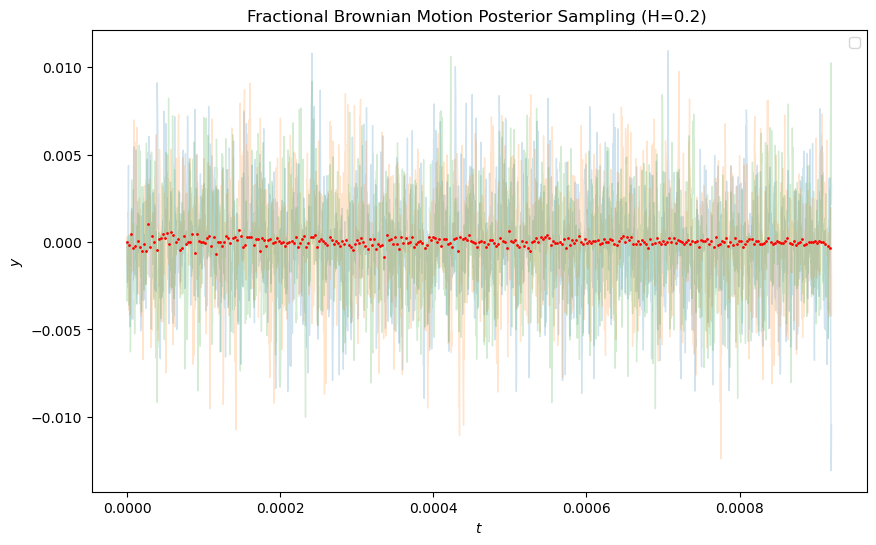

In [45]:
kernel = FractionalBrownianMotionKernel(H = 0.4)
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(x_train, spy_rt)
y_samples_posterior = gp.sample_y(x_test, 3, random_state=0)

# Plot the generated Brownian Bridge paths
plt.figure(figsize=(10, 6))
for i in range(y_samples_posterior.shape[1]):
    plt.plot(x_test, y_samples_posterior[:, i], lw=1, alpha = 0.2)
plt.plot(x_train, spy_rt, 'ro', markersize=1)

plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('Fractional Brownian Motion Posterior Sampling (H=0.2) ')
plt.legend()
plt.show()